In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
#To load the dataset
df=pd.read_csv("Ecommerce Customers.csv")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
#to check the size of the dataset
df.shape

(500, 8)

In [5]:
#to check the null value in the dataset
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
#to see the columns in dataset df
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
#to check the datatype of the data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


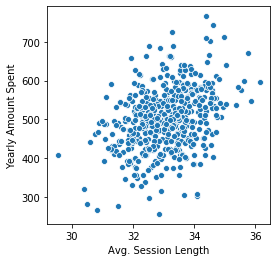

In [8]:
#check relation between independent variable TV with sales(target)
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x="Avg. Session Length",y="Yearly Amount Spent")
plt.show()

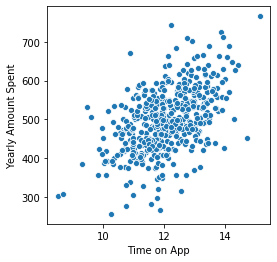

In [9]:
#check relation between independent variable Time on App with Yearly Amount Spent
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x="Time on App",y="Yearly Amount Spent")
plt.show()

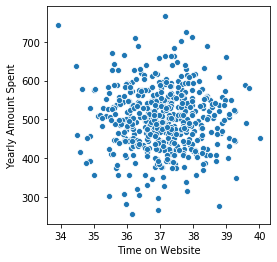

In [10]:
#check relation between independent variable Time on App with Yearly Amount Spent
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x="Time on Website",y="Yearly Amount Spent")
plt.show()

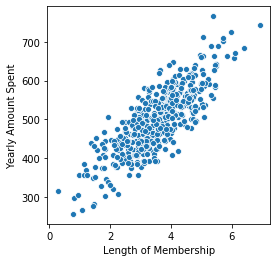

In [11]:
#check relation between independent variable Time on App with Yearly Amount Spent
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x="Length of Membership",y="Yearly Amount Spent")
plt.show()

In [12]:
#we will drop below mentioned 3 columns because they are not important for prediction
df.drop(['Email','Address','Avatar'],axis=1,inplace=True)

# Base line Model = Linear Regression

In [13]:
#we will separate independent and dependent variable 
X=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
Y=df["Yearly Amount Spent"]

In [14]:
#now we will arrange to train and test the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [15]:
#we will call the linear regression class
from sklearn.linear_model import LinearRegression

In [16]:
#create object
lr=LinearRegression()

In [17]:
#we will train data now
lr.fit(X_train,Y_train)

LinearRegression()

In [18]:
#we will test the data now
y_pred=lr.predict(X_test)

In [19]:
y_pred

array([498.81705536, 519.53403729, 562.94886718, 478.90501346,
       423.8201042 , 508.9452329 , 478.79059717, 460.08112597,
       519.38576043, 439.12699354, 487.54907742, 525.96826109,
       577.12393843, 553.53565548, 685.14181281, 473.40359409,
       314.71860742, 458.39761038, 452.38929377, 461.05452656,
       456.35300072, 332.21392109, 504.18566874, 401.88060608,
       766.19989355, 425.98233166, 513.22023323, 476.80244451,
       306.817882  , 590.05645167, 505.29246026, 390.12626034,
       463.7152543 , 316.10191094, 465.93448787, 549.73327826,
       619.77113721, 591.76573022, 495.80310959, 402.82346134,
       506.99424985, 547.62013178, 422.98145388, 558.84117357,
       441.84404018, 432.93355219, 430.19970737, 507.00591399,
       425.73050946, 402.16982748, 553.00099819, 353.71999664,
       639.24296314, 478.49076533, 452.15843176, 621.4676865 ,
       326.0497008 , 491.38826582, 411.86794125, 549.10581517,
       587.73075486, 547.94268826, 567.83335035, 588.73

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
#mean_squared_Error
mse=mean_squared_error(Y_test,y_pred)  #mse=RSS/no. of datapoint

In [22]:
print("mean_squared_error :", mse)

mean_squared_error : 80.90062369759931


In [23]:
#root mean_squared_error
rmse=np.sqrt(mse)

In [24]:
print("Root mean_squared_error :",rmse)

Root mean_squared_error : 8.99447739991598


In [25]:
# However the error score is very high even after doing Root of the error
# Still we will try to evaluate the score first than we will check for the further process

In [26]:
#evaluation method of LinearRegression then use R2-score inbuilt method :

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(Y_test,y_pred)

0.9884637234896454

In [29]:
#Now we will check assumptions of Linear Regression

In [30]:
'''1. There should be a Linear Regression between independent variable and
dependent variable'''

'1. There should be a Linear Regression between independent variable and\ndependent variable'

In [31]:
#to check residual error
residuals=Y_test-y_pred

In [32]:
residuals

304    -4.129900
340   -18.411546
47      0.724006
67     -9.594152
479   -21.652982
485     6.557247
310     0.824214
31    -12.393219
249    -0.599277
90      9.943326
322    -9.286951
168   -19.431868
119    -5.816444
66      0.065879
305     4.645791
189     5.481797
434   -10.583016
289     9.030238
142    11.534219
146     2.430469
293    -4.625137
312   -12.285051
311     1.946674
492     1.938914
65     -0.681432
374    -7.379590
34     -5.778401
342     9.280981
173    -8.055874
201     0.506268
         ...    
469     9.192298
41    -10.241969
159    -0.191600
286    15.396379
132    -5.305780
290    -9.453763
496    -2.060853
341    11.577474
80     -5.309095
46     -8.389785
456    -6.058654
93     -7.263114
446    -2.532521
81    -10.443893
372     0.547111
325   -16.599828
451     5.509370
454   -17.299407
375     2.737833
225     0.750057
139     8.117282
106    -5.786339
232    13.616398
291     5.993641
204    -4.219764
331     8.846822
197    19.348423
95    -10.2568

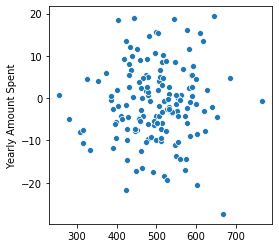

In [33]:
#scatterplot between y_pred and residuals, to check linear relationship or not
plt.figure(figsize=(4,4))
sns.scatterplot(y_pred,residuals)
plt.show()

In [34]:
'''As per the above scatter plot there is no Linear Relationship between Independent and dependent variable'''

'As per the above scatter plot there is no Linear Relationship between Independent and dependent variable'

In [35]:
'''As the first assumption is not satisfying and hence second assumption will also not get satisfied'''

'''As there is no relationship between independent and dependent variable 
we cant assumeabout the homoskedastic or heteroskedastic'''

'As there is no relationship between independent and dependent variable \nwe cant assumeabout the homoskedastic or heteroskedastic'

In [36]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [37]:
'''We can say third assumption is fulfilling due to no multicolinearity between the independent
variables of the dataset'''


'We can say third assumption is fulfilling due to no multicolinearity between the independent\nvariables of the dataset'

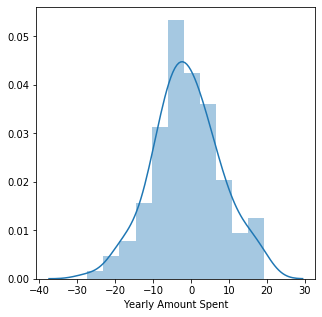

In [38]:
#distplot() : normal distributed curve : it is also known as frequency plot
plt.figure(figsize=(5,5))
sns.distplot(residuals)
plt.show()

In [39]:
'''With the help of above plot we can say the fourth assumption is also getting satisfied
but as more than 50% of the assumptions are not satisfied hence we will apply polynomial in this dataset'''

'With the help of above plot we can say the fourth assumption is also getting satisfied\nbut as more than 50% of the assumptions are not satisfied hence we will apply polynomial in this dataset'

In [40]:
#We will apply Polynomial Regression for this dataset

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
#we will separate independent and dependent variable (for polynomial)
X=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
Y=df["Yearly Amount Spent"]

In [43]:
#create object for polynomialFeatures class with passing the degree
pf=PolynomialFeatures(2)  #we are passing the degree of X means independent variable

In [44]:
#providing X independent variable for the process of degree increment 
X_poly=pf.fit_transform(X)

In [45]:
#now we will arrange to train and test the data
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.30,random_state=1)

In [46]:
#create object
lr1=LinearRegression()

In [47]:
#we will train data now
lr.fit(X_train,Y_train)

LinearRegression()

In [48]:
#we will test the data now
y_pred=lr.predict(X_test)

In [49]:
#mean_squared_Error
mse=mean_squared_error(Y_test,y_pred)  #mse=RSS/no. of datapoint

In [50]:
print("mean_squared_error :", mse)

mean_squared_error : 88.82957837749355


In [51]:
#root mean_squared_error
rmse=np.sqrt(mse)

In [52]:
print("root_mean_squared_error :", rmse)

root_mean_squared_error : 9.424944476096055


In [53]:
#Again the error percentage are so high

In [54]:
#evaluation method of LinearRegression then use R2-score inbuilt method :

In [55]:
r2_score(Y_test,y_pred)

0.9873330694916337